In [3]:
!pip install --upgrade pip

!pip install wordcloud

!pip install neattext

!pip install imblearn

!pip install mglearn

!pip install scikit-plot

!pip install keras-tqdm

!pip install gensim

!pip install pyldavis==2.1.2

  Using cached pip-21.0.1-py3-none-any.whl (1.5 MB)
  Attempting uninstall: pip
    Found existing installation: pip 20.3.3
    Uninstalling pip-20.3.3:
      Successfully uninstalled pip-20.3.3
     |████████████████████████████████| 366 kB 6.4 MB/s eta 0:00:01
     |████████████████████████████████| 112 kB 6.5 MB/s eta 0:00:01
     |████████████████████████████████| 167 kB 6.3 MB/s eta 0:00:01
     |████████████████████████████████| 22.2 MB 8.5 MB/s eta 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.1
    Uninstalling scikit-learn-0.22.1:
      Successfully uninstalled scikit-learn-0.22.1
     |████████████████████████████████| 540 kB 6.5 MB/s eta 0:00:01
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=61bb25c428d878eb90c191a41c459273567d40ccec830bf42407da455b0b966e
  Stored in directory: /home/ec2-user/.cache/pip/wheels/d6/a5/f5/78d1aacafab120a99614ca8c044d485691a11bbc1e99c3c1a3
Successfully

     |████████████████████████████████| 24.2 MB 6.4 MB/s eta 0:00:01
     |████████████████████████████████| 119 kB 74.2 MB/s eta 0:00:01
  Created wheel for smart-open: filename=smart_open-4.2.0-py3-none-any.whl size=109630 sha256=249898052d2ac6742745d71448575bb2c14e4887f0a5766e3d90bbedd7055009
  Stored in directory: /home/ec2-user/.cache/pip/wheels/05/12/87/d479d6a8f92130cd8b27e331cc433bb28dda9c20e57f0b1ab2
Successfully built smart-open
     |████████████████████████████████| 1.6 MB 6.4 MB/s eta 0:00:01
  Created wheel for pyldavis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=2810c9838756f5a48fa3bb0c94be7c7f396cc7782bc9b40d410e1b682b09a9be
  Stored in directory: /home/ec2-user/.cache/pip/wheels/57/de/11/0a038be70c2c212ce45fa0f4f9da165bb5dd87de1288394dc3
Successfully built pyldavis


In [4]:
import re
import string
import math

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
get_ipython().magic('matplotlib inline')

from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, multilabel_confusion_matrix
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay 
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.decomposition import LatentDirichletAllocation 

import neattext as nt
import neattext.functions as nfx
from wordcloud import WordCloud, STOPWORDS, tokenization

import nltk
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer 
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import RegexpTokenizer

pd.set_option("display.max_rows", 50, "display.max_columns", 50, "display.max_colwidth", 100)

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /home/ec2-user/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /home/ec2-user/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [5]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense, SpatialDropout1D
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D, GRU, SeparableConv2D, SeparableConv1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate
from keras.metrics import Accuracy, Precision, Recall, AUC

Using TensorFlow backend.


In [6]:
df = pd.read_csv("../../lemm_data.csv")

pd.set_option("display.max_rows", 50, "display.max_columns", 50, "display.max_colwidth", 400)

In [7]:
df.head()

,file_name,text,movie_title,genre,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western,texts
0,Beasts_of_No_Nation.txt,cary joji fukunaga based novel uzodinma iweala dialogue screenplay faithful form novel originally lighter form nigerian pidgin english known krio krio lingua franca west africa gambia cameroon spoken millions accented starting angle plastic exterior screen television children running circles football pitch angle boy balancing warm smile clever littler best friend ones talent agu passes line ly...,Beasts of No Nation,"['Drama', 'War']",0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,"['cary', 'joji', 'fukunaga', 'base', 'novel', 'uzodinma', 'iweala', 'dialogue', 'screenplay', 'faithful', 'form', 'novel', 'originally', 'lighter', 'form', 'nigerian', 'pidgin', 'english', 'know', 'krio', 'krio', 'lingua', 'franca', 'west', 'africa', 'gambia', 'cameroon', 'spoken', 'million', 'accent', 'start', 'angle', 'plastic', 'exterior', 'screen', 'television', 'child', 'run', 'circle', '..."
1,Beauty_and_the_Beast.txt,stephen chbosky evan spiliotopoulos based animated film beauty beast screenplay linda woolverton august resplendent bespeaking great wealth power grounds stonework immaculate hidden heart france handsome young prince lived beautiful castle single clinging rose bush stormy spring night plucks rose heart desired prince selfish unkind groomed servants faces paints exotic animal mask prince feathe...,Beauty and the Beast,"['Family', 'Fantasy', 'Musical']",0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,"['stephen', 'chbosky', 'evan', 'spiliotopoulos', 'base', 'animate', 'film', 'beauty', 'beast', 'screenplay', 'linda', 'woolverton', 'august', 'resplendent', 'bespeaking', 'great', 'wealth', 'power', 'ground', 'stonework', 'immaculate', 'hidden', 'heart', 'france', 'handsome', 'young', 'prince', 'live', 'beautiful', 'castle', 'single', 'cling', 'rise', 'bush', 'stormy', 'spring', 'night', 'pluc..."
2,Beavis_and_Butt-head_Do_America.txt,beavis butt america mike judge joe stillman location href location href mike judge joe stillman movie begins scenes screaming horror running streets big city ground shakes giant footsteps pieces building debris falling getting crushed power lines coming complete pandemonium japanese animated king kong godzilla movie footsteps getting closer ground shaking intense debris falling frame smash nat...,Beavis and Butt-head Do America,"['Animation', 'Comedy']",0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"['beavis', 'butt', 'america', 'mike', 'judge', 'joe', 'stillman', 'location', 'href', 'location', 'href', 'mike', 'judge', 'joe', 'stillman', 'movie', 'begin', 'scene', 'scream', 'horror', 'run', 'street', 'big', 'city', 'ground', 'shake', 'giant', 'footstep', 'piece', 'building', 'debris', 'fall', 'get', 'crush', 'power', 'line', 'come', 'complete', 'pandemonium', 'japanese', 'animate', 'king..."
3,Beginners.txt,mike mills single daisy vase kitchen clicks light closet rack parents clothes begins box marked home box marked thrift oliver enters bathroom flushes bottle bottle pills liquids toilet struggles old toothbrush hairbrush bottles tubes sink stares throws oliver hauls trash outside adding large pile bags older jack russell terrier follows oliver arthur sit office surrounded papers boxes books tra...,Beginners,"['Comedy', 'Drama', 'Romance']",0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,"['mike', 'mill', 'single', 'daisy', 'vase', 'kitchen', 'click', 'light', 'closet', 'rack', 'parent', 'clothes', 'begin', 'box', 'marked', 'home', 'box', 'marked', 'thrift', 'oliver', 'enters', 'bathroom', 'flush', 'bottle', 'bottle', 'pill', 'liquid', 'toilet', 'struggle', 'old', 'toothbrush', 'hairbrush', 'bottle', 'tube', 'sink', 'stare', 'throw', 'oliver', 'haul', 'trash', 'outside', 'add',..."
4,Being_Human.txt,forsyth january warner boulevard burbank california rights reserved stared sky listened c

## Define X and y variables

In [8]:
X = df['texts']
y = df[['Action', 'Adventure', 'Comedy', 'Crime', 'Drama', 'Fantasy', 'Horror', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller']]

AttributeError: 'str' object has no attribute 'value_counts'

### Assign Weights

In [9]:
cate = pd.DataFrame(y.sum()).reset_index().rename(columns = {'index':'genres1',0:'count'})
cate.head()

,genres1,count
0,Action,296
1,Adventure,179
2,Comedy,368
3,Crime,215
4,Drama,615


In [10]:
labels1 = cate.genres1.values

In [11]:
cate['class_weight'] = len(cate) / cate['count']
class_weight = {}
for index, label in enumerate(labels1):
    class_weight[index] = cate[cate['genres1'] == label]['class_weight'].values[0]
    
cate.head()

,genres1,count,class_weight
0,Action,296,0.037162
1,Adventure,179,0.061453
2,Comedy,368,0.029891
3,Crime,215,0.051163
4,Drama,615,0.017886


In [12]:
cate.sort_values('count')

,genres1,count,class_weight
7,Mystery,108,0.101852
5,Fantasy,110,0.100000
6,Horror,155,0.070968
9,Sci-Fi,170,0.064706
1,Adventure,179,0.061453
8,Romance,194,0.056701
3,Crime,215,0.051163
0,Action,296,0.037162
10,Thriller,309,0.035599
2,Comedy,368,0.029891


In [14]:
# from imblearn.over_sampling import RandomOverSampler
# ros = RandomOverSampler(random_state=0)
# X_resampled, y_resampled = ros.fit_resample(X, y)

## Train-Test-Split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [30]:
#Preview the shape of training and test set
print("X_train Shape:", X_train.shape)
print("y_train Shape:", y_train.shape)
print("X_test Shape:", X_test.shape)
print("y_test Shape:", y_test.shape)

X_train Shape: (855,)
y_train Shape: (855, 11)
X_test Shape: (286,)
y_test Shape: (286, 11)


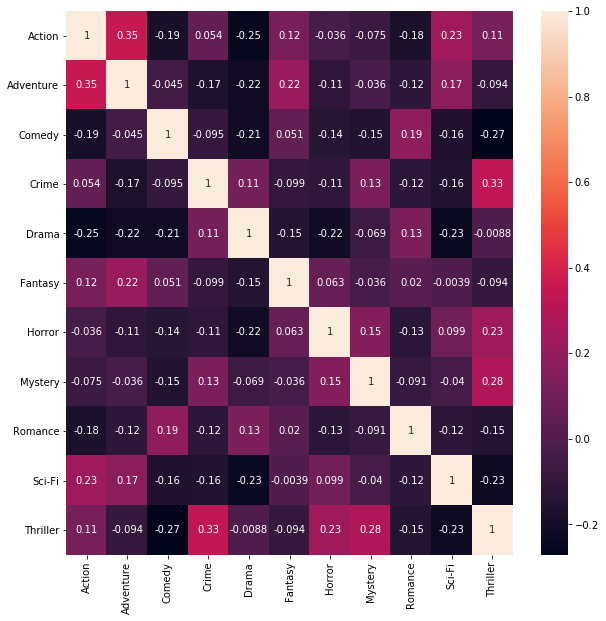

In [31]:
#Correlation matrix
corr=y_train.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True)

plt.show()

## LDA

In [34]:
vect = CountVectorizer(max_features=20000, ngram_range=(1, 4), min_df = 10, max_df = .95, stop_words='english')
X_train_vect = vect.fit_transform(X_train)
X_vect_test = vect.transform(X_test)

In [35]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(max_iter=25, random_state=0) 
# We build the model and transform the data in one step
# Computing transform takes some time,
# and we can save time by doing both at once 

document_topics = lda.fit_transform(X_train_vect)

In [36]:
lda.components_.shape

(10, 20000)

In [37]:
# For each topic (a row in the components_), sort the features (ascending) # Invert rows with [:, ::-1] to make sorting descending
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
# Get the feature names from the vectorizer
feature_names = np.array(vect.get_feature_names())

In [38]:
import mglearn
# Print out the 10 topics:
mglearn.tools.print_topics(topics=range(10), feature_names=feature_names,
                                sorting=sorting, topics_per_chunk=5, n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
john          woman         et            charlie       ship          
frank         bed           il            mike          ben           
rise          paul          le            anna          control       
boy           desk          est           girl          water         
eddie         shot          sur           sara          air           
miguel        mr            en            phil          space         
jonathan      glance        se            lucy          eric          
brian         street        une           patrick       power         
steven        glass         qui           elizabeth     fly           
thor          voice         du            arthur        screen        


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
men 

In [39]:
lda100 = LatentDirichletAllocation(n_components=100, max_iter=25, random_state=0)
document_topics100 = lda100.fit_transform(X_train_vect)

In [40]:
topics = np.array([7, 16, 24, 25, 28, 36, 37, 45, 51, 53, 54, 63, 89, 97])

sorting = np.argsort(lda100.components_, axis=1)[:, ::-1]

feature_names = np.array(vect.get_feature_names())

mglearn.tools.print_topics(topics=topics, feature_names=feature_names, sorting=sorting, topics_per_chunk=7, n_words=20)

topic 7       topic 16      topic 24      topic 25      topic 28      topic 36      topic 37      
--------      --------      --------      --------      --------      --------      --------      
willie        road          lilly         jeffrey       kate          guy           ben           
anne          water         catherine     sandy         ethan         fuck          jeff          
ann           stare         ape           frank         esther        hey           amy           
graham        shoulder      child         dorothy       luther        kid           stacy         
marcus        truck         hub           williams      daniel        shit          eric          
jack          seat          edgar         detective     max           mom           snow          
boy           wheel         dog           mike          john          dad           white         
stark         lean          men           apartment     seth          girl          snow white    
judge     

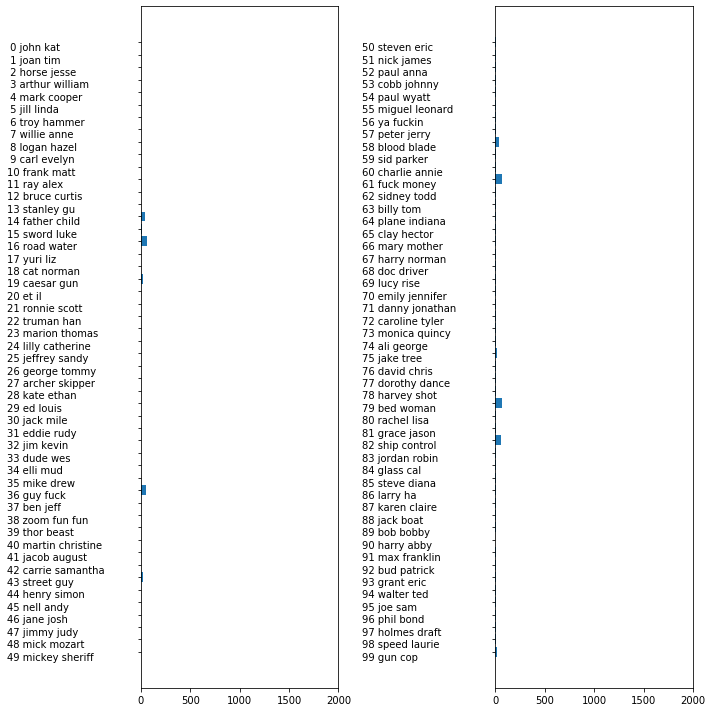

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(10, 10))

topic_names = ["{:>2} ".format(i) + " ".join(words) for i, words in enumerate(feature_names[sorting[:, :2]])] # two column bar chart:
    
for col in [0, 1]: 
    start=col*50
    end=(col+1)*50
    ax[col].barh(np.arange(50), np.sum(document_topics100, axis=0)[start:end]) 
    ax[col].set_yticks(np.arange(50)) 
    ax[col].set_yticklabels(topic_names[start:end], ha="left", va="top") 
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, 2000)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130)

plt.tight_layout()

In [42]:
import pyLDAvis
import pyLDAvis.sklearn
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
%matplotlib inline

In [43]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [44]:
vis = pyLDAvis.sklearn.prepare(lda, X_train_vect, vect)
pyLDAvis.display(vis)

## Embedding

In [39]:
tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(X_train)

In [40]:
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [41]:
vocab_size = len(tokenizer.word_index) + 1

maxlen = 200

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [43]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()

glove_file = open('../../glove.6B.300d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

embedding_matrix = zeros((vocab_size, 300))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

## t-SNE

In [44]:
from sklearn.manifold import TSNE

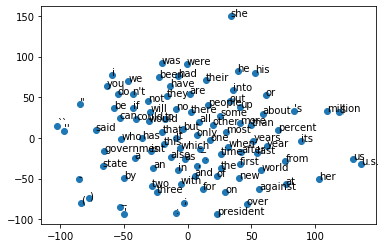

In [48]:
tsne = TSNE(n_components=2, random_state=0)
words =  list(embeddings_dictionary.keys())
vectors = [embeddings_dictionary[word] for word in words]
Yt = tsne.fit_transform(vectors[:100])
plt.scatter(Yt[:, 0], Yt[:, 1])

for label, x, y in zip(words, Yt[:, 0], Yt[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords="offset points")
plt.show()

## Model 1

In [54]:
model = Sequential()

model.add(Embedding(vocab_size, 300, weights=[embedding_matrix], trainable=False))

model.add(LSTM(128, return_sequences=True))
# model.add(GlobalMaxPooling1D())
model.add(SpatialDropout1D(0.2))
model.add(LSTM(128))
# model.add(GlobalMaxPooling1D())
model.add(Dropout(0.2))

# model.add(Flatten())
model.add(Dense(22, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(11, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[Precision(), Recall(), AUC(), 'acc'])

In [55]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 300)         26949600  
_________________________________________________________________
lstm_4 (LSTM)                (None, None, 128)         219648    
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, None, 128)         0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 22)                2838      
_________________________________________________________________
dropout_5 (Dropout)          (None, 22)               

In [56]:
history = model.fit(X_train, y_train, class_weight=class_weight, batch_size=128, epochs=5, verbose=1, validation_split=0.2)

Train on 684 samples, validate on 171 samples
Epoch 1/5
684/684 [==============================] - 39s 57ms/step - loss: 0.0260 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00 - auc_2: 0.5000 - acc: 0.7869 - val_loss: 0.0254 - val_precision_2: 0.5789 - val_recall_2: 0.2450 - val_auc_2: 0.5239 - val_acc: 0.7996
Epoch 2/5
684/684 [==============================] - 34s 49ms/step - loss: 0.0258 - precision_2: 0.2874 - recall_2: 0.3252 - auc_2: 0.5539 - acc: 0.6846 - val_loss: 0.0249 - val_precision_2: 0.2675 - val_recall_2: 0.4530 - val_auc_2: 0.6076 - val_acc: 0.6162
Epoch 3/5
684/684 [==============================] - 34s 49ms/step - loss: 0.0247 - precision_2: 0.2782 - recall_2: 0.4020 - auc_2: 0.5726 - acc: 0.6506 - val_loss: 0.0222 - val_precision_2: 0.3216 - val_recall_2: 0.4084 - val_auc_2: 0.6229 - val_acc: 0.6879
Epoch 4/5
684/684 [==============================] - 34s 49ms/step - loss: 0.0229 - precision_2: 0.3109 - recall_2: 0.3514 - auc_2: 0.5923 - acc: 0.6960 - val_loss: 0.02

In [57]:
score = model.evaluate(X_test, y_test, verbose=1)
print(score)
print("Test Loss:", score[0])
print("Test Accuracy:", score[-1])

286/286 [==============================] - 4s 13ms/step
[0.5234777731495304, 0.0, 0.0, 0.6154071092605591, 0.7733629941940308]
Test Loss: 0.5234777731495304
Test Accuracy: 0.7733629941940308


In [58]:
y_pred = model.predict(X_test)

In [59]:
y_preds = model.predict(X_test[:5])

In [60]:
y_preds > 0.5

array([[False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False]])

In [61]:
print(y_test[:5])

      Action  Adventure  Comedy  Crime  Drama  Fantasy  Horror  Mystery  \
1071       1          0       0      0      1        0       0        0   
907        0          0       1      0      0        1       0        0   
290        1          0       0      1      1        0       0        0   
844        0          0       0      0      1        0       0        0   
333        1          0       0      1      1        0       0        0   

      Romance  Sci-Fi  Thriller  
1071        0       0         0  
907         0       0         0  
290         0       0         1  
844         0       0         0  
333         0       0         1  


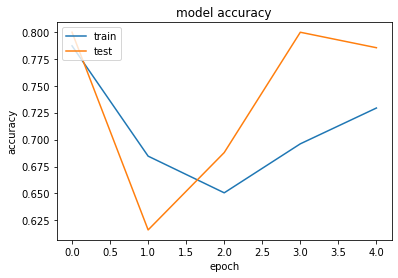

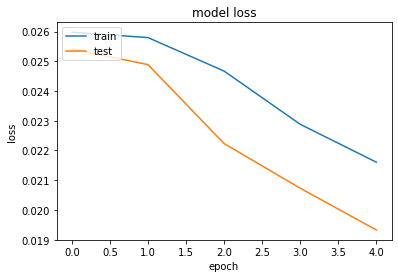

In [62]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [39]:
# import scikitplot as skplt
# predicted_probas = model.predict_proba(X_test)

# skplt.metrics.plot_roc(y_test, predicted_probas)
# plt.show()

## Model 2

In [63]:
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, LSTM, Embedding
from keras.layers import Dropout, Activation, Bidirectional, GlobalMaxPool1D
from keras.models import Sequential
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.preprocessing import text, sequence

In [73]:
model = Sequential()

model.add(Embedding(vocab_size, 300, weights=[embedding_matrix], trainable=False))
model.add(LSTM(25, return_sequences=True))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(11, activation='sigmoid'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 300)         26949600  
_________________________________________________________________
lstm_7 (LSTM)                (None, None, 25)          32600     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 25)                0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 50)                1300      
_________________________________________________________________
dropout_8 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 11)               

In [74]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=[Precision(), Recall(), AUC(), 'acc'])

In [75]:
model.fit(X_train, y_train, class_weight=class_weight, epochs=10, batch_size=128, validation_split=0.2)

Train on 684 samples, validate on 171 samples
Epoch 1/10
684/684 [==============================] - 11s 17ms/step - loss: 0.0260 - precision_4: 0.2052 - recall_4: 0.0593 - auc_4: 0.5079 - acc: 0.7508 - val_loss: 0.0254 - val_precision_4: 0.0000e+00 - val_recall_4: 0.0000e+00 - val_auc_4: 0.5967 - val_acc: 0.7852
Epoch 2/10
684/684 [==============================] - 8s 12ms/step - loss: 0.0258 - precision_4: 0.2180 - recall_4: 0.0787 - auc_4: 0.5291 - acc: 0.7438 - val_loss: 0.0251 - val_precision_4: 0.0000e+00 - val_recall_4: 0.0000e+00 - val_auc_4: 0.5843 - val_acc: 0.7852
Epoch 3/10
684/684 [==============================] - 9s 13ms/step - loss: 0.0255 - precision_4: 0.2120 - recall_4: 0.0705 - auc_4: 0.5268 - acc: 0.7463 - val_loss: 0.0248 - val_precision_4: 0.0000e+00 - val_recall_4: 0.0000e+00 - val_auc_4: 0.5630 - val_acc: 0.7852
Epoch 4/10
684/684 [==============================] - 8s 12ms/step - loss: 0.0252 - precision_4: 0.2017 - recall_4: 0.0762 - auc_4: 0.5288 - acc: 0.7391

In [77]:
score = model.evaluate(X_test, y_test, verbose=1)
print(score)
print("Test Loss:", score[0])
print("Test Accuracy:", score[-1])

286/286 [==============================] - 1s 4ms/step
[0.5126515756120215, 0.0, 0.0, 0.6536562442779541, 0.7733629941940308]
Test Loss: 0.5126515756120215
Test Accuracy: 0.7733629941940308


In [78]:
y_pred = model.predict(X_test)

In [79]:
y_preds = model.predict(X_test[:5])

In [80]:
y_preds > 0.5

array([[False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False]])

In [81]:
print(y_test[:5])

      Action  Adventure  Comedy  Crime  Drama  Fantasy  Horror  Mystery  \
1071       1          0       0      0      1        0       0        0   
907        0          0       1      0      0        1       0        0   
290        1          0       0      1      1        0       0        0   
844        0          0       0      0      1        0       0        0   
333        1          0       0      1      1        0       0        0   

      Romance  Sci-Fi  Thriller  
1071        0       0         0  
907         0       0         0  
290         0       0         1  
844         0       0         0  
333         0       0         1  


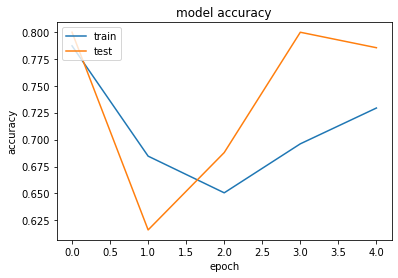

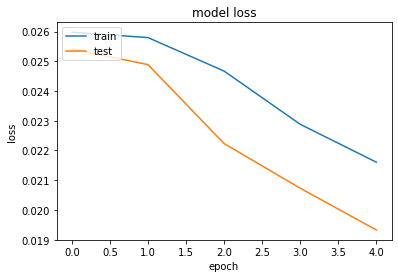

In [82]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

## Model 3

In [96]:
from keras_tqdm import TQDMNotebookCallback

from keras.models import Sequential
from keras.layers import Dense, Activation, MaxPooling1D, Embedding, Flatten, GlobalMaxPool1D, Dropout, Conv1D, GRU, SeparableConv2D
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from keras.losses import binary_crossentropy
from keras.optimizers import Adam
from keras_tqdm import TQDMCallback 

# tqdm_callback = tfa.callbacks.TQDMProgressBar()

filter_length = 64
num_classes = 11
model = Sequential()
model.add(Embedding(vocab_size, 128, input_length=maxlen))
model.add(GRU(128, return_sequences=True))
model.add(Dropout(0.1))
model.add(GRU(128, return_sequences=True))
# model.add(SeparableConv2D(filter_length, 5, padding='valid', activation='relu', strides=1))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(11, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[Precision(), Recall(), AUC(), 'acc'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 200, 128)          11498496  
_________________________________________________________________
gru_2 (GRU)                  (None, 200, 128)          98688     
_________________________________________________________________
dropout_11 (Dropout)         (None, 200, 128)          0         
_________________________________________________________________
gru_3 (GRU)                  (None, 200, 128)          98688     
_________________________________________________________________
global_max_pooling1d_6 (Glob (None, 128)               0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 50)              

In [ ]:
callbacks1 = [
    ReduceLROnPlateau(), 
    TQDMNotebookCallback(leave_inner = True, leave_outer = True),
    EarlyStopping(monitor='val_loss', patience=10), 
    ModelCheckpoint(filepath='model-conv1d1.h5', monitor='val_loss', save_best_only=True)
]

history = model.fit(X_train, y_train,
                    class_weight=class_weight,
                    epochs=40,
                    batch_size=10,
                    validation_split=0.1,
                    callbacks=callbacks1,
                   verbose=0)

In [ ]:
score = model.evaluate(X_test, y_test, verbose=1)
print(score)
print("Test Loss:", score[0])
print("Test Accuracy:", score[-1])

In [53]:
y_pred = model.predict(X_test)

In [54]:
y_preds = model.predict(X_test[:5])

In [55]:
(y_preds > 0.5)

array([[False, False, False, False,  True, False, False, False, False,
        False, False],
       [False, False,  True, False, False, False, False, False, False,
        False, False],
       [False, False, False,  True,  True, False, False, False, False,
        False,  True],
       [False, False, False, False,  True, False, False, False, False,
        False, False],
       [False, False, False, False,  True, False, False, False, False,
        False, False]])

In [56]:
print(y_test[:5])

      Action  Adventure  Comedy  Crime  Drama  Fantasy  Horror  Mystery  \
1071       1          0       0      0      1        0       0        0   
907        0          0       1      0      0        1       0        0   
290        1          0       0      1      1        0       0        0   
844        0          0       0      0      1        0       0        0   
333        1          0       0      1      1        0       0        0   

      Romance  Sci-Fi  Thriller  
1071        0       0         0  
907         0       0         0  
290         0       0         1  
844         0       0         0  
333         0       0         1  


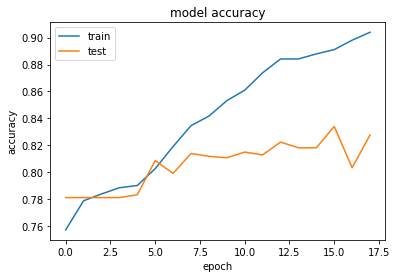

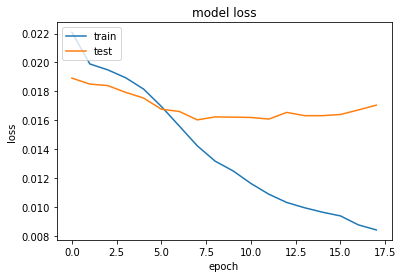

In [86]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [58]:
def plot_roc(model,y_bin,X):
    fpr = {}
    tpr = {}
    for i, cl in enumerate(model.classes_):
        fpr[cl], tpr[cl], _ = metrics.roc_curve(y_bin[:,i],model.predict_proba(X)[:,i])
    auc_scores = [round(metrics.roc_auc_score(y_bin[:,i],model.predict_proba(X)[:,i]),2) for i in range(len(model.classes_))]
    for i, key in enumerate(fpr.keys()):
        plt.plot(fpr[key],tpr[key],lw=2,label='class {}, ROC_AUC {}'.format(key,auc_scores[i]))
    plt.plot([0,1],[0,1],ls='--',lw=2)
    plt.ylim([0,1.05])
    plt.legend(loc='lower right')
    plt.title('ROC Curve',fontsize=20)
    plt.xlabel('FPR',fontsize=18)
    plt.ylabel('TPR',fontsize=18)
    
    plt.show()

## Model 4

In [92]:
model = Sequential()


model.add(Embedding(vocab_size, 32, input_length=maxlen, trainable = False))

model.add(SeparableConv1D(128,3,activation='relu'))
model.add(MaxPooling1D(3))

model.add(SeparableConv1D(128,3,activation='relu'))
model.add(MaxPooling1D(3))

model.add(SeparableConv1D(128,3,activation='relu'))
model.add(GlobalMaxPooling1D())

model.add(Dense(11,activation='sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=[Precision(), Recall(), AUC(), 'acc'])


model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 200, 32)           2874624   
_________________________________________________________________
separable_conv1d_4 (Separabl (None, 198, 128)          4320      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 66, 128)           0         
_________________________________________________________________
separable_conv1d_5 (Separabl (None, 64, 128)           16896     
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 21, 128)           0         
_________________________________________________________________
separable_conv1d_6 (Separabl (None, 19, 128)           16896     
_________________________________________________________________
global_max_pooling1d_5 (Glob (None, 128)             

In [93]:
callbacks1 = [
    ReduceLROnPlateau(), 
    TQDMNotebookCallback(leave_inner = True, leave_outer = True),
    EarlyStopping(monitor='val_loss', patience=10), 
    ModelCheckpoint(filepath='model-conv1d1.h5', monitor='val_loss', save_best_only=True)
]

history = model.fit(X_train, y_train,
                    class_weight=class_weight,
                    epochs=40,
                    batch_size=10,
                    validation_split=0.1,
                    callbacks=callbacks1,
                   verbose=0)

In [94]:
score = model.evaluate(X_test, y_test, verbose=1)
print(score)
print("Test Loss:", score[0])
print("Test Accuracy:", score[-1])

286/286 [==============================] - 0s 1ms/step
[0.49850548251525506, 0.0, 0.0, 0.6819906830787659, 0.7733629941940308]
Test Loss: 0.49850548251525506
Test Accuracy: 0.7733629941940308


In [ ]:
y_pred = model.predict(X_test)

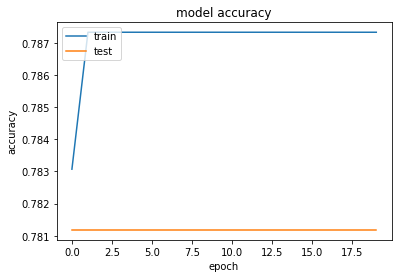

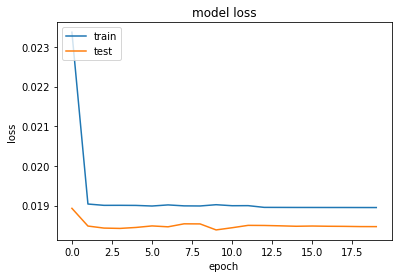

In [95]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

## Model 5

In [ ]:
model = Sequential()
model.add(Embedding(30000, 128))
model.add(LSTM(units = 128, dropout = 0.2, recurrent_dropout = 0.2,return_sequences=True))
model.add(LSTM(units = 128, dropout = 0.2, recurrent_dropout = 0.2))
model.add(Dense(units = 22, activation = 'sigmoid'))
model.summary()

In [ ]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=[Precision(), Recall(), AUC(), 'acc'])




In [ ]:
callbacks1 = [
    ReduceLROnPlateau(), 
    TQDMNotebookCallback(leave_inner = True, leave_outer = True),
    EarlyStopping(monitor='val_loss', patience=10), 
    ModelCheckpoint(filepath='model-conv1d1.h5', monitor='val_loss', save_best_only=True)
]

history = model.fit(X_train, y_train,
                    class_weight=class_weight,
                    epochs=40,
                    batch_size=10,
                    validation_split=0.1,
                    callbacks=callbacks1,
                   verbose=0)

In [ ]:
score = model.evaluate(X_test, y_test, verbose=1)
print(score)
print("Test Loss:", score[0])
print("Test Accuracy:", score[-1])

In [ ]:
y_pred = model.predict(X_test)